In [6]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

df = pd.read_csv('heart_cleveland_upload.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


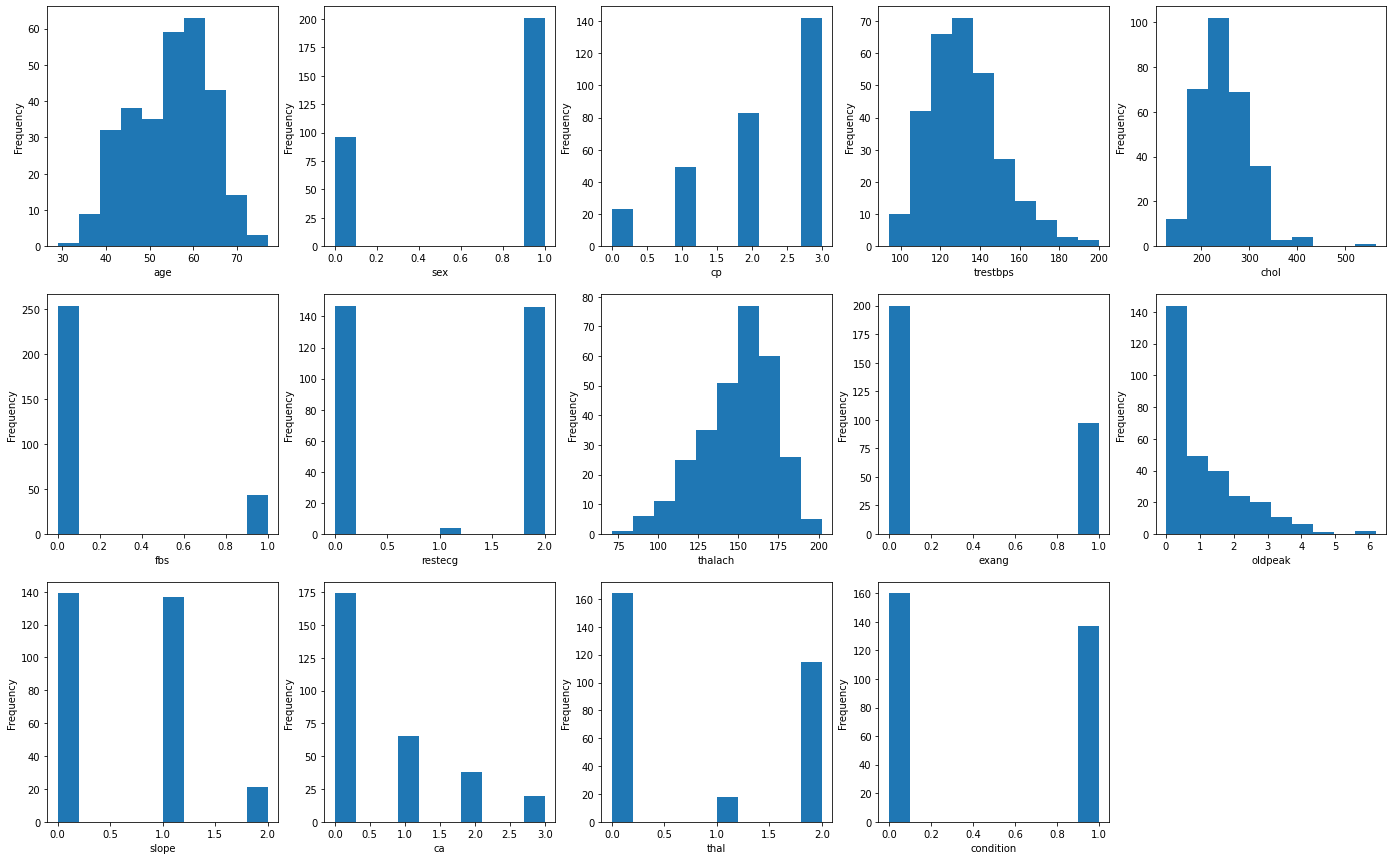

In [4]:
#Explatory Data Analysis
fig = plt.figure(figsize=(24,15))
i = 0
for column in df:
  sub = fig.add_subplot(3,5,i+1)
  sub.set_xlabel(column)
  df[column].plot(kind = 'hist')
  i = i + 1 

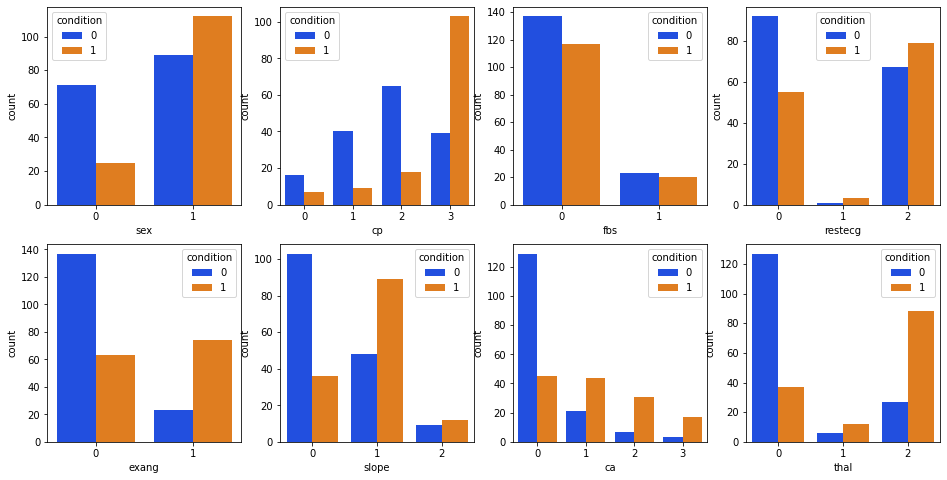

In [11]:
cat_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize = (16,8))
for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2,4,i+1)
  chart = sns.countplot(data = df, x = column, hue = 'condition', palette = 'bright')



In [17]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.drop(['condition'], axis =1)
y = df["condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

mp = []
mp.append(LogisticRegression(solver='liblinear'))
mp.append(SVC())
mp.append(KNeighborsClassifier())
mp.append(DecisionTreeClassifier())
mp.append(RandomForestClassifier())
mp.append(GaussianNB())

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in mp:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
  auc_list.append(round(metrics.auc(fpr,tpr),2))
  cm_list.append(confusion_matrix(y_test, y_pred))




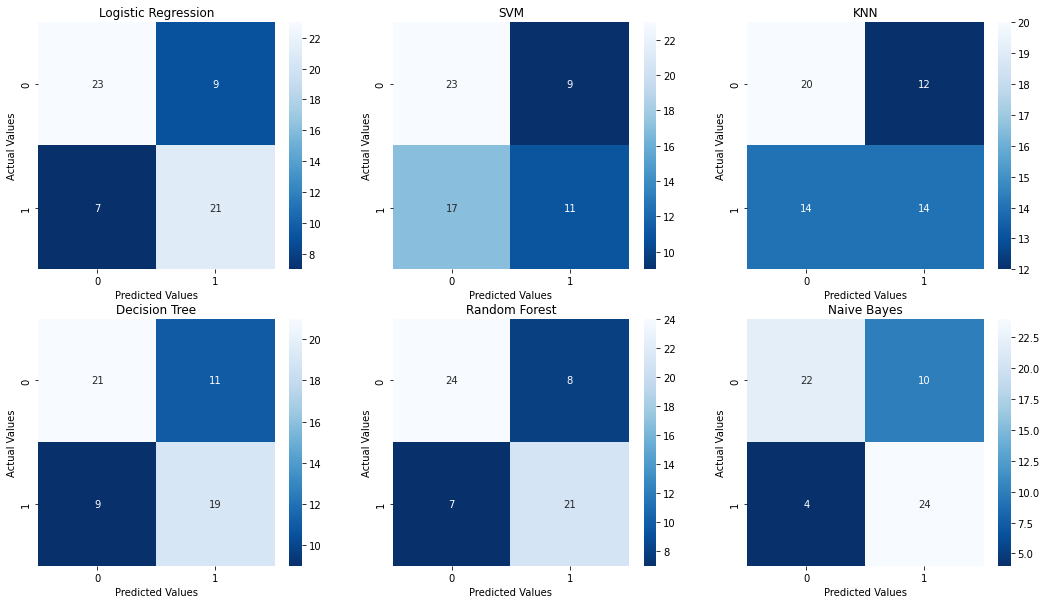

In [18]:
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')
  

In [19]:
results_df = pd.DataFrame({'Model:': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
results_df

,Model:,Accuracy,AUC
0,Logistic Regression,0.733333,0.73
1,SVM,0.566667,0.56
2,KNN,0.566667,0.56
3,Decision Tree,0.666667,0.67
4,Random Forest,0.750000,0.75
5,Naive Bayes,0.766667,0.77
